<a href="https://colab.research.google.com/github/MayankGuptaaa/Sentiment-Polarity-Classification-Assignment/blob/main/Assignment_NLP_2101117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#For necessary installation
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install tensorflow

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.4970 - loss: 1.0177 - val_accuracy: 0.5000 - val_loss: 0.7284
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.4967 - loss: 0.9279 - val_accuracy: 0.5000 - val_loss: 0.7209
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5014 - loss: 0.8503 - val_accuracy: 0.6040 - val_loss: 0.6240
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7154 - loss: 0.6650 - val_accuracy: 0.7600 - val_loss: 0.5081
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8573 - loss: 0.4567 - val_accuracy: 0.7730 - val_loss: 0.5154
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9034 - loss: 0.3340 - val_accuracy: 0.7840 - val_loss: 0.5228
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Final Performance Metrics:
True Positives (TP): 695
True Negatives (TN): 560
False Positives (FP): 271
False Negatives (FN): 136
Precision: 71.946%
Recall: 83.634%
F1-score: 77.351%


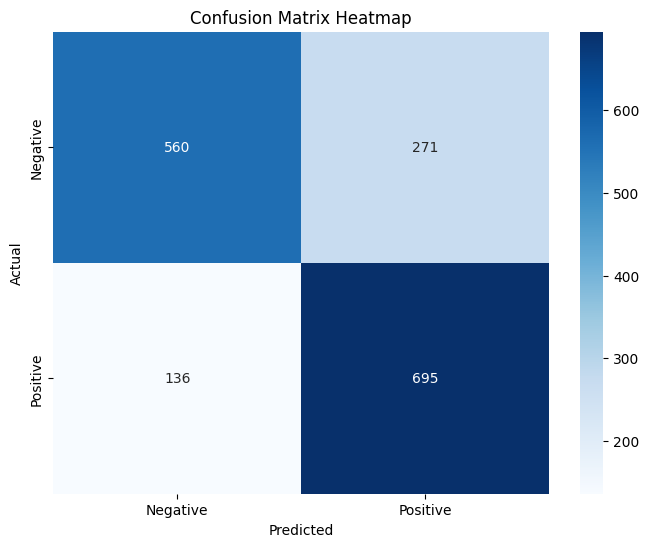

<Figure size 640x480 with 0 Axes>

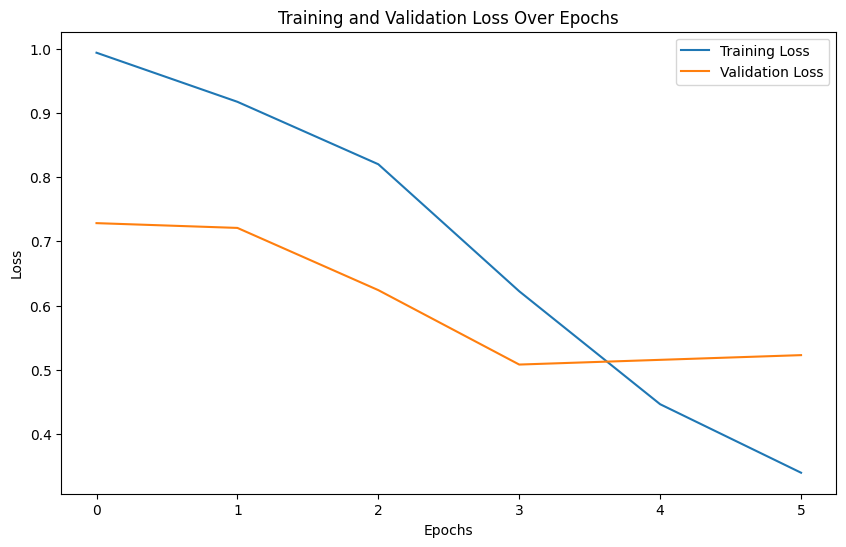

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import requests
pos_url = 'https://raw.githubusercontent.com/MayankGuptaaa/Sentiment-Polarity-Classification-Assignment/main/rt-polarity.pos'
neg_url = 'https://raw.githubusercontent.com/MayankGuptaaa/Sentiment-Polarity-Classification-Assignment/main/rt-polarity.neg'

pos_response = requests.get(pos_url)
neg_response = requests.get(neg_url)
pos_reviews = pos_response.text.splitlines()
neg_reviews = neg_response.text.splitlines()


# Creating dataframes for positive and negative reviews
neg_df = pd.DataFrame(neg_reviews, columns=["Review"])
neg_df['class'] = 0
pos_df = pd.DataFrame(pos_reviews, columns=["Review"])
pos_df['class'] = 1

# Splitting the data into training, validation, and test sets respectively
train_data = pd.concat([neg_df.iloc[:4000], pos_df.iloc[:4000]])
val_data = pd.concat([neg_df.iloc[4000:4500], pos_df.iloc[4000:4500]])
test_data = pd.concat([neg_df.iloc[4500:], pos_df.iloc[4500:]])

X_train, y_train = train_data['Review'], train_data['class']
X_val, y_val = val_data['Review'], val_data['class']
X_test, y_test = test_data['Review'], test_data['class']

# Applying TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train)
X_val = tfidf.transform(X_val)
X_test = tfidf.transform(X_test)

# Convert sparse matrix to dense matrix for use with Keras
X_train = X_train.toarray()
X_val = X_val.toarray()
X_test = X_test.toarray()

# Convert target labels to numpy arrays
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# Building an optimized neural network model
optimizer = Adam(learning_rate=0.0001)
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Class weighting to handle class imbalance
class_weight = {0: 1, 1: 2}

# Training the model with early stopping and class weights
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weight, callbacks=[early_stopping])

# Evaluating the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Calculating confusion matrix and metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
precision = precision * 100
recall = recall * 100
f1 = f1 * 100

# Printing final performance metrics
print("\nFinal Performance Metrics:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Precision: {precision:.3f}%")
print(f"Recall: {recall:.3f}%")
print(f"F1-score: {f1:.3f}%")

# Plotting the confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()
plt.savefig('confusion_matrix_heatmap.png', bbox_inches='tight', dpi=300)

# Plotting the training and validation loss graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
